# Install libraries and load dataset

In [ ]:
# install packages
#!pip install -U pip
#!pip install -U setuptools wheel
#!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 136.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 175.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 151.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 130.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json

kaggle_username = "njeanette"
kaggle_key = "dc7a71aabee0aaa9796318818ca9b525"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
train = TabularDataset("/train.csv")
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,13173.000000,13173.000000,13164.000000,13127.000000,13157.000000,13166.000000,13166.000000,13161.000000,13140.000000,13173.000000
mean,555441.784939,568.530859,59.271313,29.168808,20651.373928,1776.872376,40.542676,11.104988,12.857587,13.297375,...,52.411982,67.932236,73.074635,77.120929,76.281156,71.417027,59.323286,46.100150,42.096213,96.515221
std,259476.503094,275.758485,13.218883,5.752820,13840.379638,3876.061897,4.031027,1.511534,1.952248,3.390472,...,11.069900,6.301740,6.581630,5.335091,5.282156,6.502875,9.261934,12.245594,11.209011,108.969873
min,100043.000000,100.000000,18.000000,15.000000,635.550000,0.920000,20.600000,0.000000,6.310000,5.930000,...,28.790000,45.880000,53.460000,58.540000,56.200000,51.830000,37.540000,19.150000,15.380000,0.000000
25%,335100.000000,330.000000,50.000000,24.825000,9160.340000,163.150000,37.190000,10.150000,11.650000,11.000000,...,42.900000,63.220000,68.050000,73.170000,72.550000,67.020000,51.970000,35.560000,33.370000,3.000000
50%,555769.000000,557.000000,59.000000,28.580000,18952.780000,700.340000,40.640000,11.000000,12.900000,12.530000,...,50.290000,66.120000,71.640000,76.650000,76.080000,70.880000,57.450000,42.430000,38.500000,44.000000
75%,780967.000000,832.000000,67.000000,33.000000,30021.280000,1666.520000,42.940000,12.140000,13.910000,14.970000,...,62.220000,72.590000,77.660000,80.290000,79.130000,75.640000,67.360000,55.730000,50.500000,181.000000
max,999982.000000,995.000000,91.000000,97.000000,71374.130000,29851.690000,54.570000,17.680000,35.300000,62.100000,...,76.490000,86.570000,90.660000,96.430000,95.770000,89.190000,81.460000,76.300000,73.540000,365.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/test.csv")
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("/solution_template.csv")
submission.head()

,patient_id,metastatic_diagnosis_period
0,730681,100
1,334212,0
2,571362,100
3,907331,100
4,208382,100


# Train model using AutoGluon

# Exploratory Data Analysis, Transformation, and Cleaning

In [ ]:
# Look at missing data
train.isnull().sum()
# AutoGluon handles missing data differently for each model

patient_id                        0
patient_race                   6657
payer_type                     1765
patient_state                     0
patient_zip3                      0
                               ... 
Average of Sep-18                 7
Average of Oct-18                 7
Average of Nov-18                12
Average of Dec-18                33
metastatic_diagnosis_period       0
Length: 152, dtype: int64

In [ ]:
# Print out different data types

# Categorical columns
cat_col = [col for col in train.columns if train[col].dtype == 'object']
print('Categorical columns: ',cat_col)
# Numerical columns
num_col = [col for col in train.columns if train[col].dtype != 'object']
print('Numerical columns: ',num_col)

Categorical columns:  ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']
Numerical columns:  ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'inc

In [ ]:
# feature importance
#predictor.feature_importance(train)
# note:takes long to run

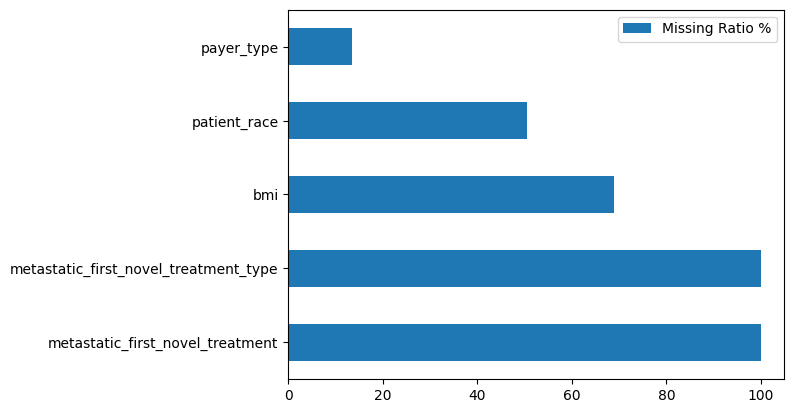

In [ ]:
import matplotlib.pyplot as plt

# Look at missing or inconsistent data
# plot columns that have the most missing values
def plot_nas(df: pd.DataFrame):
  if df.isnull().sum().sum() != 0:
    na_df = (df.isnull().sum() / len(df)) * 100
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data_more_than_10_percent = missing_data[missing_data['Missing Ratio %'] > 10.0]
    missing_data_more_than_10_percent.plot(kind = "barh")
    plt.show()
  else:
    print('No NAs found')

plot_nas(train)

In [ ]:
# if categorical is empty, fill with N/A
# fill in empty value in "patient_race" column with "N/A"
train["patient_race"].fillna("N/A", inplace=True)
test["patient_race"].fillna("N/A", inplace=True)

# fill in empty value in "payer_type" column with "N/A"
train["payer_type"].fillna("N/A", inplace=True)
test["payer_type"].fillna("N/A", inplace=True)

# for numerical, fill with mean, average, or median

# Calculate the mean of the 'bmi' column, ignoring NaN values
mean_train_bmi = train['bmi'].mean()
mean_test_bmi = test['bmi'].mean()

# Fill NaN values in the 'bmi' column with the calculated mean
train['bmi'].fillna(mean_train_bmi, inplace=True)
test['bmi'].fillna(mean_test_bmi, inplace=True)

# check missingness
# plot_nas(train_df)
# if plot shows, there is still missing NAs, if none/error ,then may have no NAs

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
5999,426903,Hispanic,MEDICAID,CA,906,West,Pacific,19,F,90.0,...,64.84,64.4,69.37,78.29,77.42,73.15,70.26,65.92,59.39,0
7556,890022,White,MEDICAID,KY,425,South,East South Central,33,F,97.0,...,50.82,71.0,74.13,75.58,74.64,73.27,58.95,42.94,40.89,132


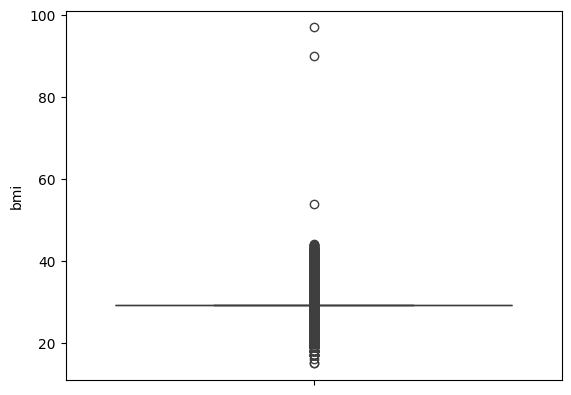

In [ ]:
import seaborn as sns

# filter our data outliers

# For example, if our average BMI is 29.0 and normal BMI categories are:
# Underweight = <18.5
# Normal weight = 18.5 to 24.9
# Overweight = 25.9 to 29.9
# Obesity >= 30

# plot the BMI value to detect outliers
sns.boxplot(train['bmi'])

outlier_train = train[train['bmi'] > 70]
display(outlier_train)

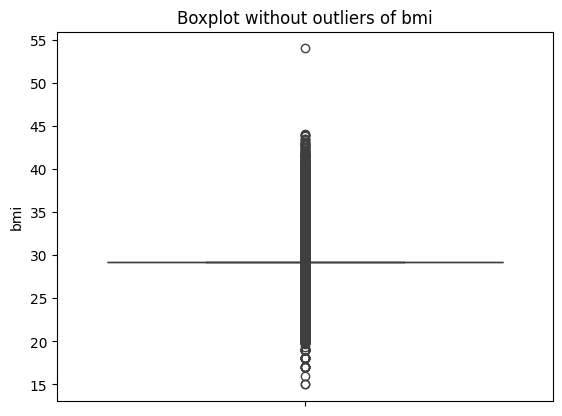

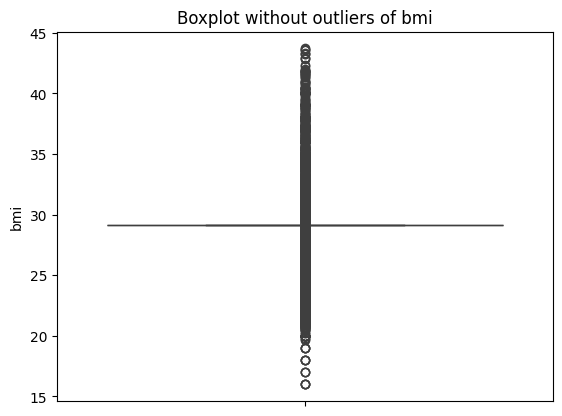

In [ ]:
# Remove outliers
def removal_box_plot(df, column, threshold):
  removed_outliers = df[df[column] <= threshold]

  sns.boxplot(removed_outliers[column])
  plt.title(f'Boxplot without outliers of {column}')
  plt.show()
  return removed_outliers

threshold_value = 70
no_outliers = removal_box_plot(train, 'bmi', threshold_value)
no_outliers = removal_box_plot(test, 'bmi', threshold_value)

In [ ]:
# Check for inconsistencies and duplicates
duplicated_id = test["patient_id"].isin(train["patient_id"])
num_duplicated_id = duplicated_id.sum()
print(f"The number of duplicate patient_id for the test and training datasets: {num_duplicated_id}")
# no duplicates in patient_id

The number of duplicate patient_id for the test and training datasets: 0


In [ ]:
# Check for inconsistent data in location variables
train[['patient_state','patient_zip3']].drop_duplicates().groupby(['patient_zip3'], as_index=False)['patient_state']. \
    count().sort_values('patient_state', ascending=False).reset_index(drop=True).head()
# There seems to be duplicates

,patient_zip3,patient_state
0,630,2
1,864,2
2,100,1
3,678,1
4,668,1


In [ ]:
train.loc[train.patient_zip3.isin([630, 864]), ['patient_state','patient_zip3']].drop_duplicates()
# duplicates are for zipcode 630 and 864 in two different states

,patient_state,patient_zip3
475,MO,630
2221,IL,630
5299,AZ,864
9229,CA,864


In [ ]:
import numpy as np
# Fix correct zip code. 630 is MO and 864 is AZ, according to Google.
train['patient_state'] = np.where(train['patient_zip3'] == 630, 'MO', np.where(train['patient_zip3'] == 864, 'AZ', train['patient_state']))

In [ ]:
# Check if fix is applied
#train[['patient_state','patient_zip3']].drop_duplicates().groupby(['patient_zip3'], as_index=False)['patient_state']. \
#    count().sort_values('patient_state', ascending=False).reset_index(drop=True).head()

In [ ]:
test[['patient_state','patient_zip3']].drop_duplicates().groupby(['patient_zip3'], as_index=False)['patient_state']. \
    count().sort_values('patient_state', ascending=False).reset_index(drop=True).head()
# No duplicates in test data

,patient_zip3,patient_state
0,100,1
1,667,1
2,672,1
3,674,1
4,675,1


In [ ]:
train[['patient_state', 'Division', ]].drop_duplicates().groupby(['patient_state'], as_index=False)['Division']. \
    count().sort_values('Division', ascending=False).reset_index(drop=True).head()
# there is one duplicate

,patient_state,Division
0,MO,2
1,MT,1
2,NC,1
3,ND,1
4,NE,1


In [ ]:
train.loc[train.patient_state == 'MO', ['patient_state','Division']].drop_duplicates()

,patient_state,Division
101,MO,West North Central
2221,MO,East North Central


In [ ]:
train.loc[train.patient_state == 'MO', 'Division'].value_counts()
# There appears to be a typo and can change East to West

Division
West North Central    167
East North Central      1
Name: count, dtype: int64

In [ ]:
train['Division'] = np.where(train['patient_state'] == 'MO', 'West North Central', train['patient_state'])

In [ ]:
# check if changes applied
#train.loc[train.patient_state == 'MO', ['patient_state','Division']].drop_duplicates()

In [ ]:
test[['patient_state', 'Division', ]].drop_duplicates().groupby(['patient_state'], as_index=False)['Division']. \
    count().sort_values('Division', ascending=False).reset_index(drop=True).head()
# no duplicates

,patient_state,Division
0,AK,1
1,AL,1
2,NC,1
3,ND,1
4,NE,1


## Data Transformation

Note to self: Run AutoGluon before data transformation to see how it does. Fix error from duplicate columns.

In [ ]:
# Scaling
display(train["home_value"])

0         87384.33
1         92026.84
2        392600.40
3        873756.00
4        602986.80
           ...    
13168    233350.20
13169    148319.80
13170    677688.50
13171    218029.00
13172    873756.00
Name: home_value, Length: 13173, dtype: float64

In [ ]:
# Mix-max scaling
def min_max_scaling(df, column_name):
  min_value = df[column_name].min()
  max_value = df[column_name].max()
  df[column_name] = (df[column_name] - min_value) / (max_value - min_value)

# apply min-max scaling to Salary column
min_max_scaling(train, 'home_value')

# print the dataframe after min-max scaling
print("DataFrame after Min-Max Scaling:")
display(train["home_value"])

DataFrame after Min-Max Scaling:


0        0.014926
1        0.017516
2        0.185202
3        0.453632
4        0.302574
           ...   
13168    0.096359
13169    0.048921
13170    0.344249
13171    0.087811
13172    0.453632
Name: home_value, Length: 13173, dtype: float64

In [ ]:
# Don't want to feed a number directly into model but split value into diff categories
# based on numerical rangers. Consider a person's age.
# Bucketized columns
bins = [2,3,9,13,20,70,100]
labels = ['Infant', 'Toddler', 'Kid', 'Teen', 'Adult', 'Old Adult']
train['patient_age_group'] = pd.cut(train['patient_age'], bins=bins, labels=labels, right=False)
test['patient_age_group'] = pd.cut(test['patient_age'], bins=bins, labels=labels, right=False)
display(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,patient_age_group
0,268700,N/A,COMMERCIAL,AR,724,South,AR,39,F,29.168808,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,Adult
1,484983,White,N/A,IL,629,Midwest,IL,55,F,35.360000,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,Adult
2,277055,N/A,COMMERCIAL,CA,925,West,CA,59,F,29.168808,...,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157,Adult
3,320055,Hispanic,MEDICAID,CA,900,West,CA,59,F,29.168808,...,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146,Adult
4,190386,N/A,COMMERCIAL,CA,934,West,CA,71,F,29.168808,...,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286,Old Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13168,588544,Hispanic,MEDICAID,PA,191,Northeast,PA,59,F,29.168808,...,66.12,70.38,77.18,77.53,70.90,56.53,41.46,37.49,106,Adult
13169,393047,N/A,COMMERCIAL,TX,757,South,TX,73,F,30.670000,...,77.82,84.52,85.35,84.61,78.50,67.24,52.16,50.01,92,Old Adult
13170,790904,N/A,COMMERCIAL,CA,928,West,CA,19,F,29.168808,...,66.04,70.87,80.68,79.75,75.27,71.40,66.01,59.20,0,Teen
13171,455518,N/A,COMMERCIAL,MI,481,Midwest,MI,52,F,29.168808,...,63.56,68.68,72.13,72.55,66.17,49.79,34.16,32.28,330,Adult


In [ ]:
predictor_new_features = TabularPredictor(
    label="metastatic_diagnosis_period",
    learner_kwargs={"ignored_columns": ["metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type", "patient_gender"]},
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train,
    time_limit=3000,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240601_172205"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240601_172205/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 796 second

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -82.004485  root_mean_squared_error       4.308806  1125.147376                0.001192           0.078981            2       True         13
1          CatBoost_BAG_L1  -82.246735  root_mean_squared_error       0.428934   400.531711                0.428934         400.531711            1       True          6
2          LightGBM_BAG_L1  -82.320545  root_mean_squared_error       0.244155   105.293829                0.244155         105.293829            1       True          4
3           XGBoost_BAG_L1  -82.644200  root_mean_squared_error       0.691132   157.349624                0.691132         157.349624            1       True          9
4        LightGBMXT_BAG_L1  -82.719675  root_mean_squared_error       0.446263    81.886

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.17248017396211,
  'KNeighborsDist_BAG_L1': -113.17248017396211,
  'LightGBMXT_BAG_L1': -82.71967548297268,
  'LightGBM_BAG_L1': -82.3205445808467,
  'RandomForestMSE_BAG_L1': -86.20691838518086,
  'CatBo

#Create predictions from test dataset

In [ ]:
predictions = predictor_new_features.predict(test)
predictions.head()

0    190.763641
1     97.826462
2    201.343781
3    220.755356
4     63.138184
Name: metastatic_diagnosis_period, dtype: float32

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    5646.000000
mean      110.976212
std        60.605648
min        36.577255
25%        73.338144
50%        80.605133
75%       106.097925
max       247.590744
Name: metastatic_diagnosis_period, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions<0).sum()

0

In [ ]:
# Set them to zero if so
#predictions[predictions<0] = 0

## Set predictions to submission dataframe, save, and submit

In [ ]:
submission["metastatic_diagnosis_period"] = predictions
submission.to_csv("submission_v5.csv", index=False)

In [ ]:
!kaggle competitions submit -c widsdatathon2024-challenge2 -f submission_v5.csv -m "With Transformations"

100% 90.2k/90.2k [00:00<00:00, 115kB/s]
Successfully submitted to WiDS Datathon 2024 Challenge #2

In [ ]:
!kaggle competitions submissions -c widsdatathon2024-challenge2 | tail -n +1 | head -n 6

fileName                         date                 description           status    publicScore  privateScore  
-------------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_v5.csv                2024-06-01 18:18:44  With Transformations  complete  84.565                     
submission_v4_4.csv              2024-06-01 11:48:03  with HPO              complete  83.07                      
submission_v4_3.csv              2024-06-01 11:13:47  with HPO              complete  82.779                     
submission_v4_2.csv              2024-06-01 10:00:33  with HPO              complete  82.752                     


# Hyper parameter optimization

In [ ]:
from autogluon.common import space
## From autogluon documentation

# LightGBM (GBM) model
gbm_options = {
    'num_boost_round': space.Int(100, 1000, default=300),
    'num_leaves': space.Int(31, 127, default=31),
    'max_depth': space.Int(-1, 15, default=6),  # -1 means no limit
    'learning_rate': space.Real(0.01, 0.3, default=0.1, log=True),
    'min_child_samples': space.Int(10, 100, default=20),
    'subsample': space.Real(0.6, 1.0, default=0.8),
    'colsample_bytree': space.Real(0.6, 1.0, default=0.8),
    'reg_alpha': space.Real(0.0, 1.0, default=0.0),
    'reg_lambda': space.Real(0.0, 1.0, default=0.0),
    'min_split_gain': space.Real(0.0, 0.1, default=0.0),
    'bagging_fraction': space.Real(0.6, 1.0, default=0.8),
}

# Random Forest (RF) model
rf_options = {
    'n_estimators': space.Int(100, 1000, default=100),
    'max_depth': space.Int(10, 40, default=20),
    'min_samples_split': space.Int(2, 10, default=2),
    'min_samples_leaf': space.Int(1, 4, default=1),
    'max_features': space.Categorical('auto', 'sqrt', 'log2'),
    'bootstrap': space.Categorical(True, False),
}

# XGBoost (XGB) model
xgb_options = {
    'n_estimators': space.Int(50, 300, default=100),
    'max_depth': space.Int(3, 10, default=6),
    'learning_rate': space.Real(0.01, 0.3, default=0.1, log=True),
}

# CatBoost (CAT) model
catboost_options = {
    'iterations': space.Int(50, 300, default=100),
    'depth': space.Int(3, 10, default=6),
    'learning_rate': space.Real(0.01, 0.3, default=0.1, log=True),
    'l2_leaf_reg': space.Real(1.0, 10.0, default=3.0),
    'bagging_temperature': space.Real(0.0, 1.0, default=0.8),
}

# Neural Network (NN_TORCH) hyperparameters
nn_options = {
    'num_epochs': 10,
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),
}

hyperparameters = {
    'GBM': gbm_options,
    'RF': rf_options,
    'XGB': xgb_options,
    'CAT': catboost_options,
    'NN_TORCH': nn_options
}


num_trials = 10
search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label="metastatic_diagnosis_period",
    learner_kwargs={"ignored_columns": ["metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type", "patient_gender"]},
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train,
    time_limit=3000,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

ModuleNotFoundError: No module named 'autogluon'

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -81.433501  root_mean_squared_error       0.003662  1167.220149                0.001296           0.039142            3       True         10
1   LightGBM_BAG_L2/T2 -81.851697  root_mean_squared_error       0.002160  1006.899346                0.001230         272.197167            2       True          7
2   LightGBM_BAG_L2/T4 -82.024989  root_mean_squared_error       0.001141   992.978711                0.000212         258.276533            2       True          9
3   LightGBM_BAG_L2/T1 -82.132891  root_mean_squared_error       0.001169   845.696434                0.000240         110.994256            2       True          6
4   LightGBM_BAG_L2/T3 -82.230278  root_mean_squared_error       0.001135   894.983840                0.000206   

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -82.4141525689746,
  'LightGBM_BAG_L1/T2': -82.85890632420987,
  'LightGBM_BAG_L1/T3': -82.87247682100322,
  'LightGBM_BAG_L1/T4': -82.6689011536555,
  'WeightedEnsemble_L2': -82.39331977982648,
  'LightGBM_BAG_L2/T1': -82.13289111960029,
  'LightGBM_BAG_L2/T2': -81.8516968809677,
  'LightGBM_BAG_L2/T3': -82.23027792002371,
  'LightGBM_BAG_L2/T4': -82.02498868307485,
  'WeightedEnsemble_L3': -81.4335007210645},
 'model_

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0
predictions_new_hpo = pd.DataFrame(data=predictions_new_hpo)
predictions_new_hpo.head()

,metastatic_diagnosis_period
0,162.242081
1,78.970222
2,206.692642
3,224.372192
4,41.263283


In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("submission_v4_4.csv")
submission_new_hpo["metastatic_diagnosis_period"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_v6.csv", index=False)

In [ ]:
!kaggle competitions submit -c widsdatathon2024-challenge2 -f submission_v6.csv -m "with HPO"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 54, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 806, in competition_submit_cli
    submit_result = self.competition_submit(file_name, message,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 757, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.10/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'submission_v4_5.csv'


In [ ]:
!kaggle competitions submissions -c widsdatathon2024-challenge2 | tail -n +1 | head -n 6

fileName                         date                 description           status    publicScore  privateScore  
-------------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_v4_4.csv              2024-06-01 11:48:03  with HPO              complete  83.07                      
submission_v4_3.csv              2024-06-01 11:13:47  with HPO              complete  82.779                     
submission_v4_2.csv              2024-06-01 10:00:33  with HPO              complete  82.752                     
submission_v3_2.csv              2024-06-01 09:59:19  with HPO              complete  82.883                     


# Try other models

In [ ]:
from autogluon.tabular import TabularPredictor, TabularDataset
from autogluon.common import space

# Neural Network model
nn_options = {
    'num_epochs': 10,
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),
}

# Gradient Boost Model
gbm_options = {
    'num_boost_round': 100,
    'num_leaves': space.Int(lower=26, upper=66, default=36),
}

# XGBoost Model
xgb_options = {
    'n_estimators': space.Int(50, 300, default=100),
    'max_depth': space.Int(3, 10, default=6),
    'learning_rate': space.Real(0.01, 0.3, default=0.1, log=True),
}

# CatBoost Model
catboost_options = {
    'iterations': space.Int(50, 300, default=100),
    'depth': space.Int(3, 10, default=6),
    'learning_rate': space.Real(0.01, 0.3, default=0.1, log=True),
    'l2_leaf_reg': space.Real(1.0, 10.0, default=3.0),
    'bagging_temperature': space.Real(0.0, 1.0, default=0.8),
}

# Random Forest Model
rf_options = {
    'n_estimators': space.Int(100, 1000, default=100),
    'max_depth': space.Int(10, 40, default=20),
    'min_samples_split': space.Int(2, 10, default=2),
    'min_samples_leaf': space.Int(1, 4, default=1),
    'max_features': space.Categorical('auto', 'sqrt', 'log2'),
    'bootstrap': space.Categorical(True, False),
}

# KNN Model
knn_options = {
    'n_neighbors': space.Int(3, 11, default=5),
    'weights': space.Categorical('uniform', 'distance'),
    'algorithm': space.Categorical('auto', 'ball_tree', 'kd_tree', 'brute'),
    'leaf_size': space.Int(20, 50, default=30),
    'p': space.Int(1, 2, default=2),
}

# Combine hyperparameters into a dictionary
hyperparameters = {
    'NN_TORCH': nn_options,
    'GBM': gbm_options,
    'XGB': xgb_options,
    'CAT': catboost_options,
    'RF': rf_options,
    'KNN': knn_options
}

# Define hyperparameter tuning kwargs
num_trials = 5
search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

# Initialize and train the Tabular Predictor with hyperparameter tuning
predictor_new_hpo2 = TabularPredictor(
    label="metastatic_diagnosis_period",
    learner_kwargs={"ignored_columns": ["metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type", "patient_gender"]},
    eval_metric="root_mean_squared_error",
    problem_type="regression"
).fit(
    train_data=train,
    time_limit=3000,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240601_092222"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240601_092222/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.


RayTaskError(TypeError): [36mray::_sub_fit()[39m (pid=60205, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/predictor/predictor.py", line 4997, in _sub_fit
    predictor._fit(ag_fit_kwargs=ag_fit_kwargs, ag_post_fit_kwargs=ag_post_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/predictor/predictor.py", line 1142, in _fit
    self._learner.fit(**ag_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/learner/abstract_learner.py", line 159, in fit
    return self._fit(X=X, X_val=X_val, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/learner/default_learner.py", line 128, in _fit
    trainer.fit(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/trainer/auto_trainer.py", line 121, in fit
    log_str += f"\t'{k}': {hyperparameters[k][:3]},\n"
TypeError: unhashable type: 'slice'

In [ ]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -81.688856  root_mean_squared_error       0.003763  1055.499000                0.001146           0.082121            3       True         20
1    LightGBM_BAG_L2/T3 -81.937391  root_mean_squared_error       0.001997   865.495511                0.000178          87.417814            2       True         13
2    LightGBM_BAG_L2/T1 -81.943402  root_mean_squared_error       0.001995   850.782595                0.000175          72.704899            2       True         11
3    LightGBM_BAG_L2/T5 -81.975029  root_mean_squared_error       0.002010   853.435498                0.000191          75.357801            2       True         15
4    LightGBM_BAG_L2/T2 -82.045457  root_mean_squared_error       0.002017   838.526263                0.000

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T4': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T4': 'Stacke

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2[predictions_new_hpo2 < 0] = 0
predictions_new_hpo2 = pd.DataFrame(data=predictions_new_hpo2)
predictions_new_hpo2.head()

,metastatic_diagnosis_period
0,186.798431
1,80.056053
2,196.787613
3,225.949936
4,50.028351


In [ ]:
# Same submitting predictions
submission_new_hpo2 = pd.read_csv("submission_v3.csv")
submission_new_hpo2["metastatic_diagnosis_period"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_v4.csv", index=False)

In [ ]:
!kaggle competitions submit -c widsdatathon2024-challenge2 -f submission_v4.csv -m "with HPO"

100% 91.4k/91.4k [00:00<00:00, 221kB/s] 
Successfully submitted to WiDS Datathon 2024 Challenge #2

In [ ]:
!kaggle competitions submissions -c widsdatathon2024-challenge2 | tail -n +1 | head -n 6

fileName                         date                 description           status    publicScore  privateScore  
-------------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_v4.csv                2024-06-01 08:46:45  with HPO              complete  82.76                      
submission_v3_2.csv              2024-06-01 07:47:58  with HPO              complete  82.883                     
submission_v3.csv                2024-06-01 07:25:21  with HPO              complete  82.784                     
submission_v3.csv                2024-06-01 07:24:36  with HPO              error                                
